In [1]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib.pyplot import show

In [2]:
crime_data = pd.read_csv('/Users/ameykelekar/Documents/DataAnalysisUsingPython/Data Analysis on Crime in Chicago/Chicago_crime/Crimes_-_2001_to_present.csv')

In [3]:
crime_data.head(2)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,6309193,HP390075,06/11/2008 11:00:00 PM,045XX W 87TH ST,4387,OTHER OFFENSE,VIOLATE ORDER OF PROTECTION,APARTMENT,False,True,...,18.0,70.0,26,1147487.0,1846446.0,2008,02/04/2016 06:33:39 AM,41.734598,-87.735264,"(41.734598385, -87.73526384)"
1,6309194,HP399120,06/16/2008 07:05:27 PM,010XX N MASSASOIT AVE,0810,THEFT,OVER $500,RESIDENCE,False,False,...,29.0,25.0,06,1137833.0,1906342.0,2008,02/04/2016 06:33:39 AM,41.899141,-87.769192,"(41.899141429, -87.769191932)"


In [4]:
crime_data['Primary Type'].value_counts()

THEFT                                1292228
BATTERY                              1135840
CRIMINAL DAMAGE                       715964
NARCOTICS                             686075
OTHER OFFENSE                         384787
ASSAULT                               380047
BURGLARY                              363473
MOTOR VEHICLE THEFT                   293239
ROBBERY                               234284
DECEPTIVE PRACTICE                    222798
CRIMINAL TRESPASS                     180051
PROSTITUTION                           66948
WEAPONS VIOLATION                      60971
PUBLIC PEACE VIOLATION                 45009
OFFENSE INVOLVING CHILDREN             40509
CRIM SEXUAL ASSAULT                    23666
SEX OFFENSE                            22841
GAMBLING                               14035
LIQUOR LAW VIOLATION                   13612
INTERFERENCE WITH PUBLIC OFFICER       12840
ARSON                                  10354
HOMICIDE                                8162
KIDNAPPING

In [5]:
len(crime_data['Primary Type'].unique())

35

In [6]:
len(crime_data.groupby(['Primary Type','Year']).size())

477

In [7]:
100*crime_data[crime_data.Arrest==True].groupby(['Primary Type','Year']).size()

Primary Type       Year
ARSON              2001      18100
                   2002      15500
                   2003      14000
                   2004      10900
                   2005      12000
                   2006      11700
                   2007       9300
                   2008       5900
                   2009       6900
                   2010       6600
                   2011       4800
                   2012       4600
                   2013       4600
                   2014       3400
                   2015       4700
                   2016       3700
ASSAULT            2001     715000
                   2002     734000
                   2003     690900
                   2004     700400
                   2005     663100
                   2006     628800
                   2007     655000
                   2008     531600
                   2009     570000
                   2010     505100
                   2011     518400
                   2012     479

In [8]:
new_df1 = (100*crime_data[crime_data.Arrest==True]['Primary Type'].value_counts()/crime_data['Primary Type'].value_counts()).sort_values(ascending = False).reset_index()

In [9]:
new_df1.columns = ['Primary Type', 'Arrest Percentage']

In [10]:
new_df1.head(5)

,Primary Type,Arrest Percentage
0,DOMESTIC VIOLENCE,100.000000
1,PROSTITUTION,99.601183
2,NARCOTICS,99.356193
3,PUBLIC INDECENCY,99.285714
4,GAMBLING,99.258995


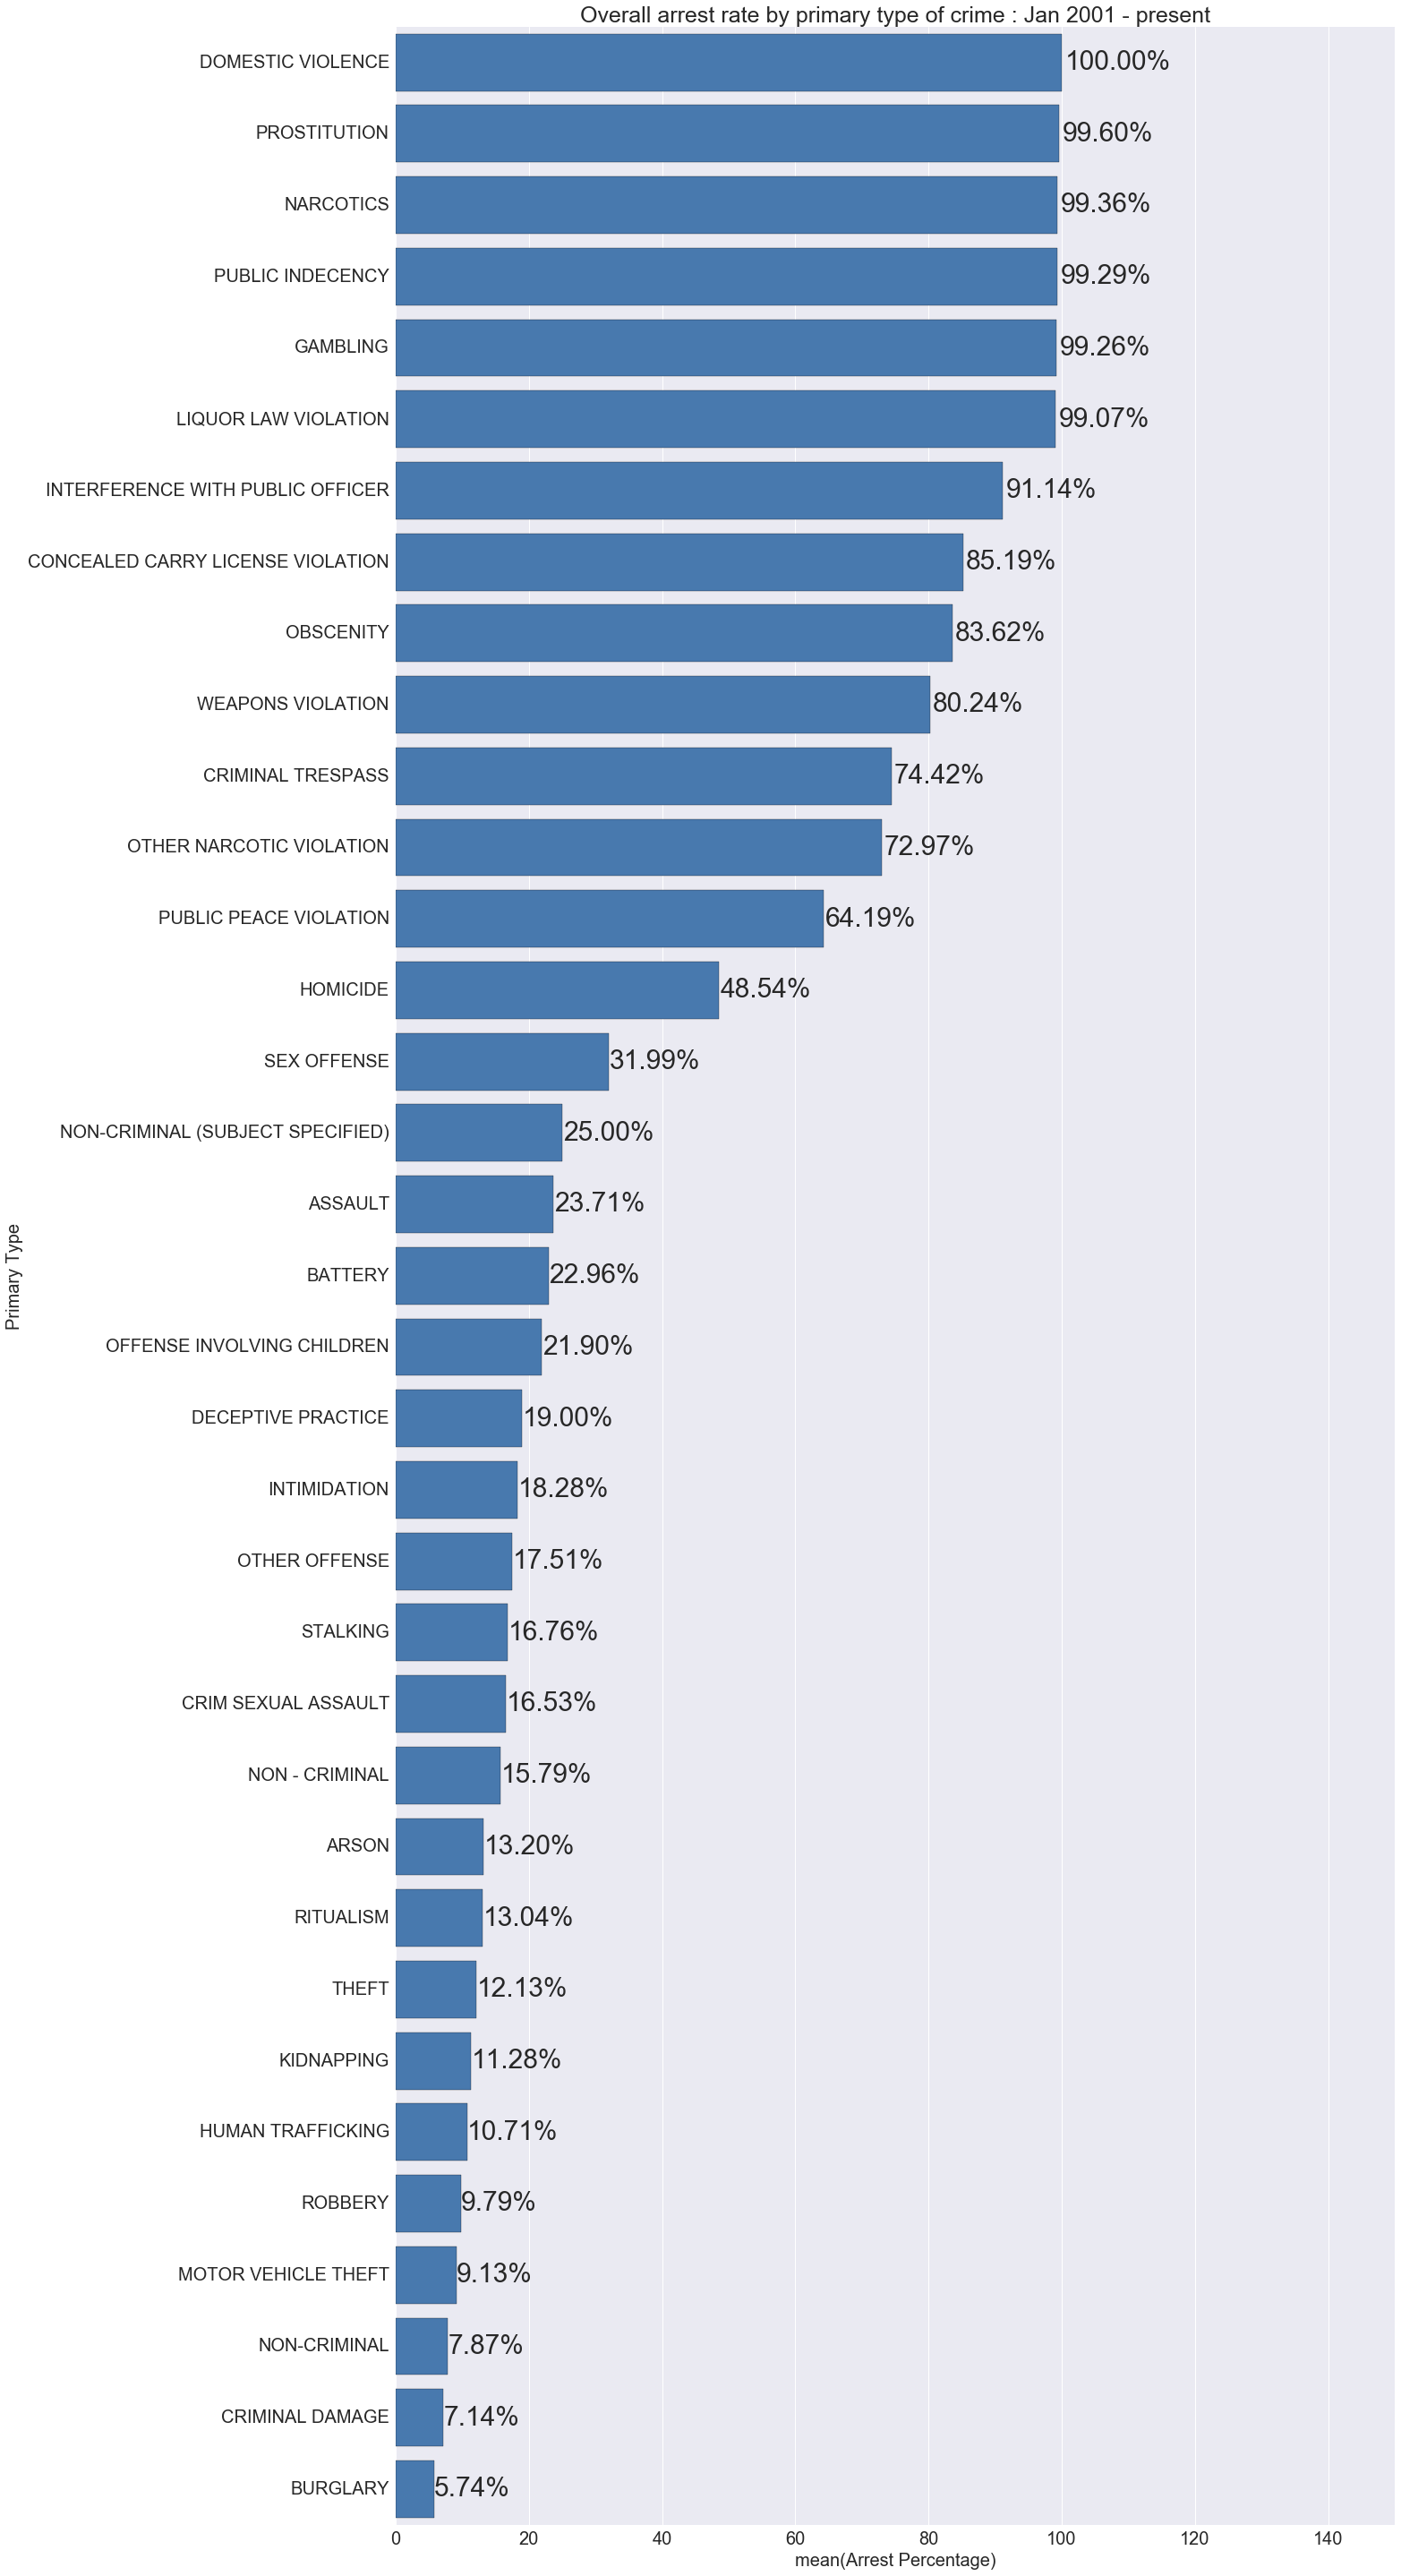

In [11]:
#Change your figure size to be (20,50)
plt.subplots(figsize=(20,50))
#Make backround while
sns.set_style('white')
#every bar should have same color - windows blue
ax = sns.barplot(x='Arrest Percentage',y='Primary Type',data= new_df1, color='#3778bf')
#change font size of ticks and labels to make them look big(Don't use deafult font size)
ax.xaxis.get_label().set_fontsize(20)
ax.yaxis.get_label().set_fontsize(20)
ax.set_xbound(0,150)
ax.tick_params(axis='x',which='major',labelsize=20)
ax.tick_params(axis='y',which='major',labelsize=20)
#change the tilte
ax.set_title('Overall arrest rate by primary type of crime : Jan 2001 - present')
ax.title.set_fontsize(25)
for p in ax.patches:
    output = '%1.2f'%(p.get_width())+ '%'
    ax.annotate(output,(p.get_width() * 1.005, p.get_y() + 0.5),fontsize=30)
show()

In [12]:
new_df2 = crime_data[crime_data.Arrest==True].groupby(['Primary Type','Year']).size().reset_index(name="Arrest Count")

In [13]:
new_df2.head(5)

,Primary Type,Year,Arrest Count
0,ARSON,2001,181
1,ARSON,2002,155
2,ARSON,2003,140
3,ARSON,2004,109
4,ARSON,2005,120


In [14]:
new_df3 = crime_data.groupby(['Primary Type','Year']).size().reset_index(name="Total Count")

In [15]:
new_df3.head(5)

,Primary Type,Year,Total Count
0,ARSON,2001,1010
1,ARSON,2002,1032
2,ARSON,2003,955
3,ARSON,2004,778
4,ARSON,2005,691


In [16]:
new_df4 = pd.merge(new_df2, new_df3,on=['Primary Type','Year'], how='inner')

In [17]:
new_df4['Arrest Rate'] = 100 * new_df4['Arrest Count']/new_df4['Total Count']

In [18]:
new_df4.head(5)

,Primary Type,Year,Arrest Count,Total Count,Arrest Rate
0,ARSON,2001,181,1010,17.920792
1,ARSON,2002,155,1032,15.019380
2,ARSON,2003,140,955,14.659686
3,ARSON,2004,109,778,14.010283
4,ARSON,2005,120,691,17.366136


In [19]:
new_df5 = pd.merge(new_df4, new_df1[new_df1['Arrest Percentage'] > 50],on='Primary Type', how='inner').ix[:,:-1]

In [20]:
new_df5.head(5)

,Primary Type,Year,Arrest Count,Total Count,Arrest Rate
0,CONCEALED CARRY LICENSE VIOLATION,2014,6,15,40.000000
1,CONCEALED CARRY LICENSE VIOLATION,2015,32,34,94.117647
2,CONCEALED CARRY LICENSE VIOLATION,2016,31,32,96.875000
3,CRIMINAL TRESPASS,2001,10262,13240,77.507553
4,CRIMINAL TRESPASS,2002,10632,13880,76.599424


In [24]:
new_df6 = pd.merge(new_df4, new_df1[(new_df1['Arrest Percentage'] <= 50) & (new_df1['Arrest Percentage'] > 15) ],on='Primary Type', how='inner').ix[:,:-1]

In [25]:
new_df6.head(5)

,Primary Type,Year,Arrest Count,Total Count,Arrest Rate
0,ASSAULT,2001,7150,31384,22.782309
1,ASSAULT,2002,7340,31521,23.286063
2,ASSAULT,2003,6909,29477,23.438613
3,ASSAULT,2004,7004,28850,24.277296
4,ASSAULT,2005,6631,27066,24.499372


In [28]:
new_df7 = pd.merge(new_df4, new_df1[new_df1['Arrest Percentage'] <= 15],on='Primary Type', how='inner').ix[:,:-1]

In [29]:
new_df7.head(5)

,Primary Type,Year,Arrest Count,Total Count,Arrest Rate
0,ARSON,2001,181,1010,17.920792
1,ARSON,2002,155,1032,15.019380
2,ARSON,2003,140,955,14.659686
3,ARSON,2004,109,778,14.010283
4,ARSON,2005,120,691,17.366136


In [55]:
def create_graph(df,title):
    sns.set_style('white')
    #every bar should have same color - windows blue
    ax = sns.factorplot(x="Year", y="Arrest Rate", hue="Primary Type",data= df,size=8, aspect=2)
    #change font size of ticks and labels to make them look big(Don't use deafult font size)
    ax.ax.xaxis.get_label().set_fontsize(20)
    ax.ax.yaxis.get_label().set_fontsize(20)
    ax.ax.tick_params(axis='x',which='major',labelsize=20)
    ax.ax.tick_params(axis='y',which='major',labelsize=20)
    #change the tilte
    ax.ax.set_title(title)
    ax.ax.title.set_fontsize(25)
    show()

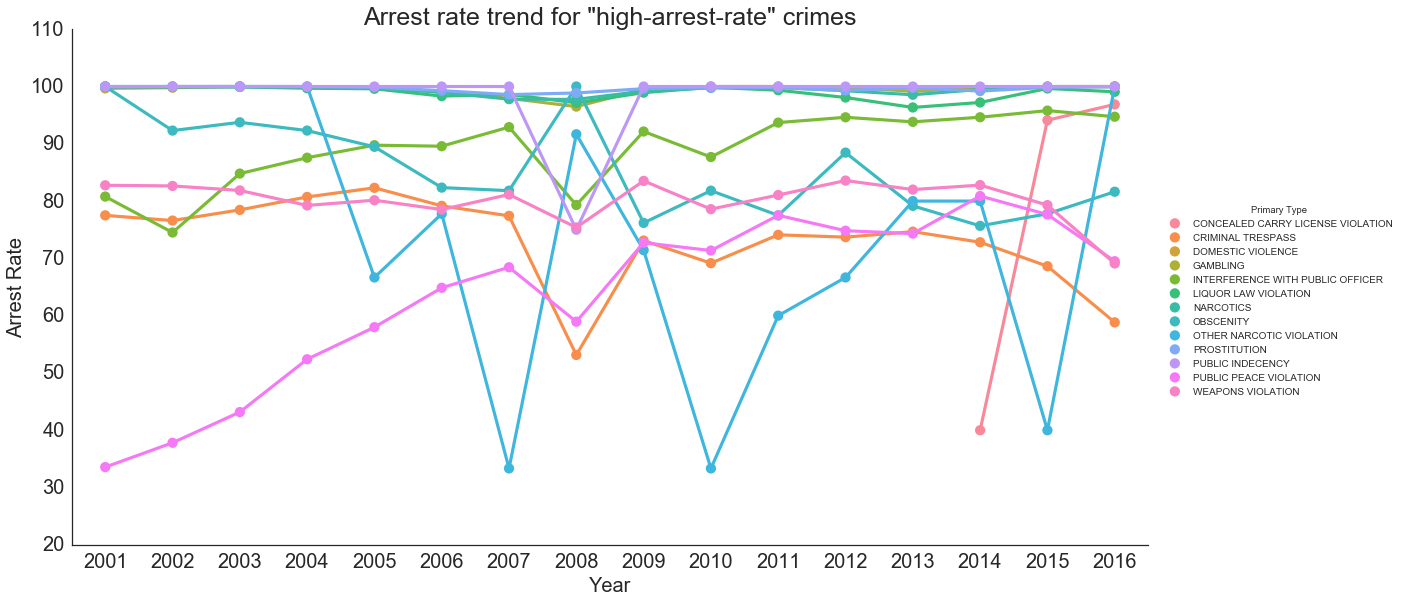

In [60]:
create_graph(new_df5, 'Arrest rate trend for "high-arrest-rate" crimes')

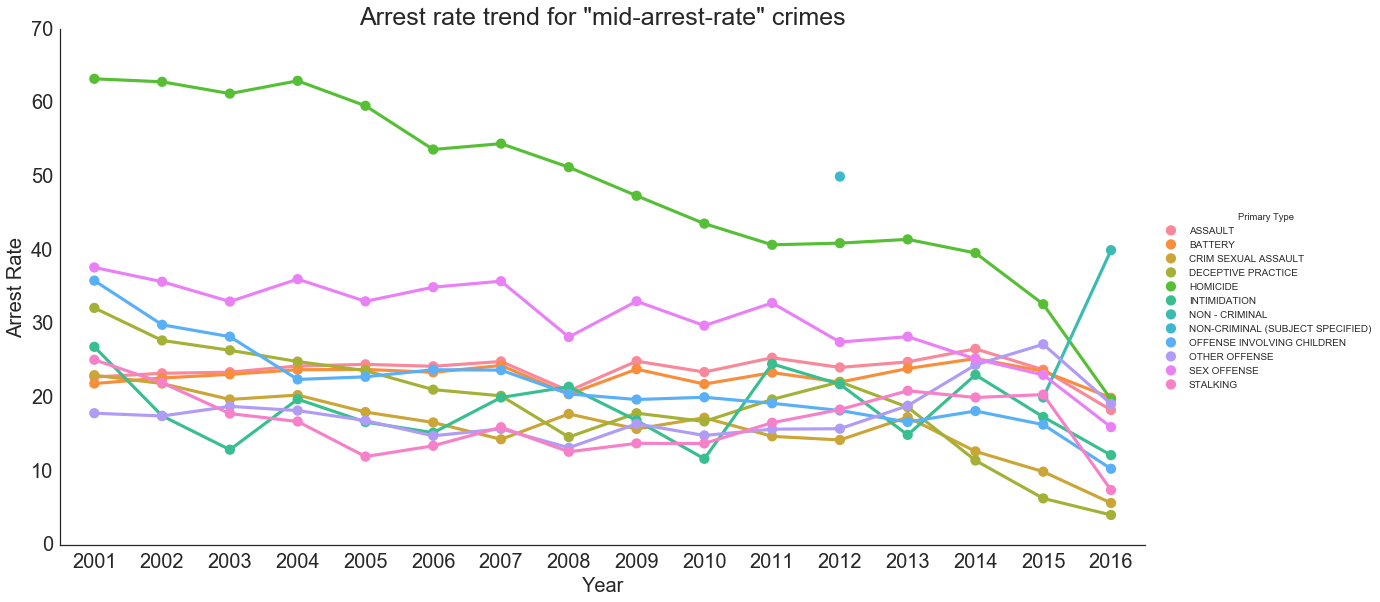

In [61]:
create_graph(new_df6, 'Arrest rate trend for "mid-arrest-rate" crimes')

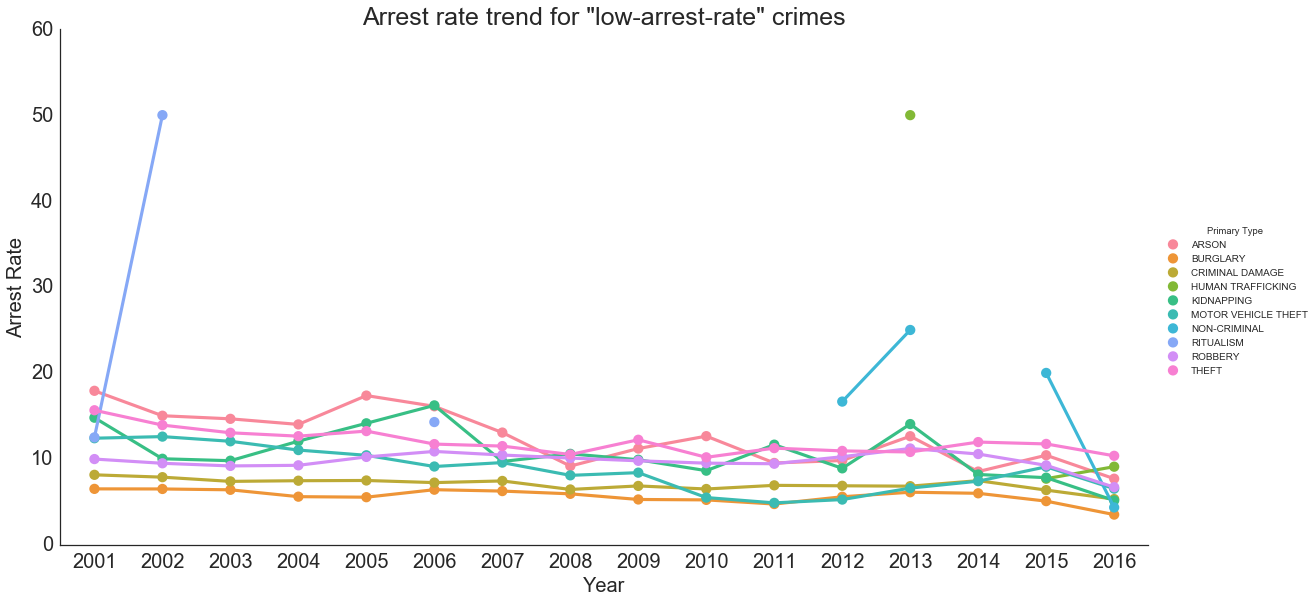

In [62]:
create_graph(new_df7, 'Arrest rate trend for "low-arrest-rate" crimes')